In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

output_path = "../data/processed/m1_outputs/"
os.makedirs(output_path, exist_ok=True)

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [24]:
# Load datasets
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
sellers = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
payments = pd.read_csv('../data/raw/olist_order_payments_dataset.csv')
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('../data/raw/olist_geolocation_dataset.csv')
translation = pd.read_csv('../data/raw/product_category_name_translation.csv')

print("Orders:", orders.shape)
print("Items:", items.shape)
print("Products:", products.shape)


Orders: (99441, 8)
Items: (112650, 7)
Products: (32951, 9)


In [25]:
# Base merge
master_df = orders.merge(items, on='order_id', how='left')

# Product information
master_df = master_df.merge(products, on='product_id', how='left')

# Category translation
master_df = master_df.merge(translation, on='product_category_name', how='left')

# Customer info
master_df = master_df.merge(customers, on='customer_id', how='left')

# Seller info
master_df = master_df.merge(sellers, on='seller_id', how='left')

print("Master Shape:", master_df.shape)
master_df.head()


Master Shape: (113425, 30)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752.0,mogi das cruzes,SP


In [26]:
date_cols = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    master_df[col] = pd.to_datetime(master_df[col], errors='coerce')

master_df['price'] = pd.to_numeric(master_df['price'], errors='coerce')
master_df['freight_value'] = pd.to_numeric(master_df['freight_value'], errors='coerce')

master_df['order_id'] = master_df['order_id'].astype(str)
master_df['customer_id'] = master_df['customer_id'].astype(str)
master_df['product_id'] = master_df['product_id'].astype(str)


In [27]:
# Remove missing delivery date
master_df = master_df[~master_df['order_delivered_customer_date'].isna()]

# Keep only delivered orders
master_df = master_df[master_df['order_status'] == 'delivered']

# Fill missing categories
master_df['product_category_name_english'] = master_df[
    'product_category_name_english'
].fillna('unknown')

# Fill missing freight
master_df['freight_value'] = master_df['freight_value'].fillna(0)


In [28]:
master_df = master_df[(master_df['price'] >= 0) &
                      (master_df['freight_value'] >= 0)]

# Date filtering
master_df = master_df[
    (master_df['order_purchase_timestamp'] >= '2017-01-01') &
    (master_df['order_purchase_timestamp'] <= '2018-08-31')
]

# Remove duplicates
master_df = master_df.drop_duplicates()

print(master_df.shape)

(109872, 30)


In [29]:
master_df.to_csv('../data/processed/master_dataset.csv', index=False)

In [30]:
total_orders = master_df['order_id'].nunique()
total_revenue = master_df['price'].sum()
aov = total_revenue / total_orders
avg_items = master_df.groupby('order_id')['product_id'].count().mean()

date_range = (
    master_df['order_purchase_timestamp'].min(),
    master_df['order_purchase_timestamp'].max()
)

print("Total Orders:", total_orders)
print("Total Revenue:", total_revenue)
print("AOV:", aov)
print("Avg Items per Order:", avg_items)
print("Date Range:", date_range)

Total Orders: 96203
Total Revenue: 13179777.95
AOV: 136.99965645561988
Avg Items per Order: 1.1420849661652963
Date Range: (Timestamp('2017-01-05 11:56:06'), Timestamp('2018-08-29 15:00:37'))


In [31]:
master_df['year_month'] = master_df['order_purchase_timestamp'].dt.to_period('M')

monthly = master_df.groupby('year_month').agg(
    orders=('order_id', 'nunique'),
    revenue=('price', 'sum')
).reset_index()

monthly['aov'] = monthly['revenue'] / monthly['orders']
monthly['MoM_growth'] = monthly['orders'].pct_change() * 100

monthly.head()

,year_month,orders,revenue,aov,MoM_growth
0,2017-01,750,111798.36,149.064480,NaN
1,2017-02,1653,234223.40,141.695947,120.400000
2,2017-03,2546,359198.85,141.083602,54.022989
3,2017-04,2303,340669.68,147.924307,-9.544383
4,2017-05,3545,489159.25,137.985684,53.929657


In [32]:
master_df['day_of_week'] = master_df['order_purchase_timestamp'].dt.day_name()

daily_pattern = master_df.groupby('day_of_week')['order_id'].nunique().reset_index()
daily_pattern

,day_of_week,order_id
0,Friday,13645
1,Monday,15660
2,Saturday,10519
3,Sunday,11612
4,Thursday,14280
5,Tuesday,15448
6,Wednesday,15039


In [33]:
master_df['hour'] = master_df['order_purchase_timestamp'].dt.hour

hourly_pattern = master_df.groupby('hour')['order_id'].nunique().reset_index()

In [34]:
category_summary = master_df.groupby(
    'product_category_name_english'
).agg(
    orders=('order_id', 'nunique'),
    revenue=('price', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

category_summary['order_percentage'] = (
    category_summary['orders'] / total_orders * 100
)

top10_volume = category_summary.sort_values(
    'orders', ascending=False
).head(10)

top10_revenue = category_summary.sort_values(
    'revenue', ascending=False
).head(10)

In [35]:
state_summary = master_df.groupby('customer_state').agg(
    orders=('order_id', 'nunique'),
    revenue=('price', 'sum')
).reset_index()

state_summary['percentage'] = (
    state_summary['orders'] / total_orders * 100
)


In [36]:
master_df['cross_state'] = np.where(
    master_df['customer_state'] != master_df['seller_state'],
    'cross_state',
    'in_state'
)

master_df['delivery_time'] = (
    master_df['order_delivered_customer_date'] -
    master_df['order_purchase_timestamp']
).dt.days

delivery_comparison = master_df.groupby('cross_state')['delivery_time'].mean()


In [37]:
master_df['month'] = master_df['order_purchase_timestamp'].dt.month

seasonality = master_df.groupby('month')['order_id'].nunique().reset_index()

In [38]:
from sklearn.linear_model import LinearRegression

monthly['month_index'] = np.arange(len(monthly))

X = monthly[['month_index']]
y = monthly['orders']

model = LinearRegression()
model.fit(X, y)

monthly['trend'] = model.predict(X)

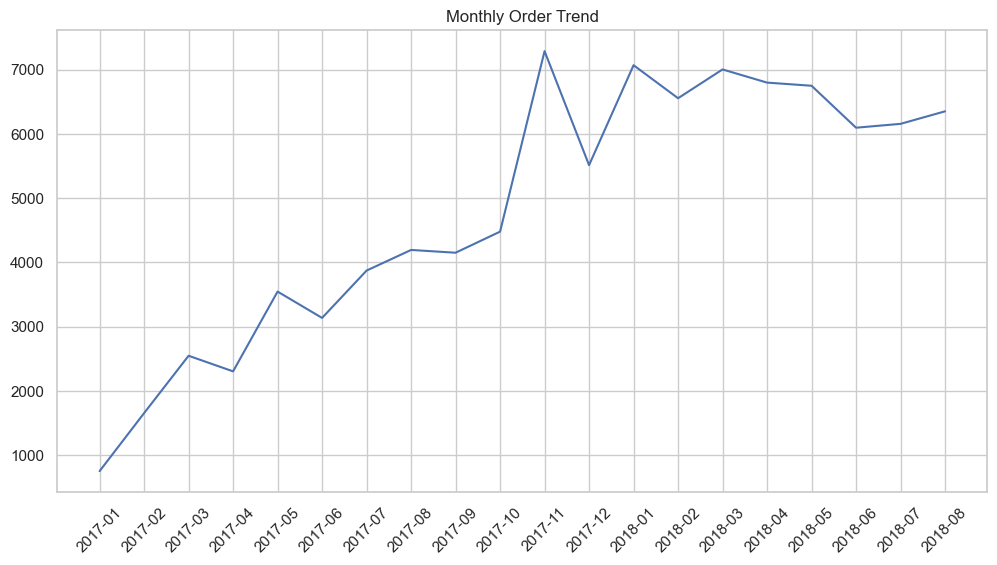

In [39]:
plt.figure(figsize=(12,6))
plt.plot(monthly['year_month'].astype(str), monthly['orders'])
plt.xticks(rotation=45)
plt.title("Monthly Order Trend")
plt.show()

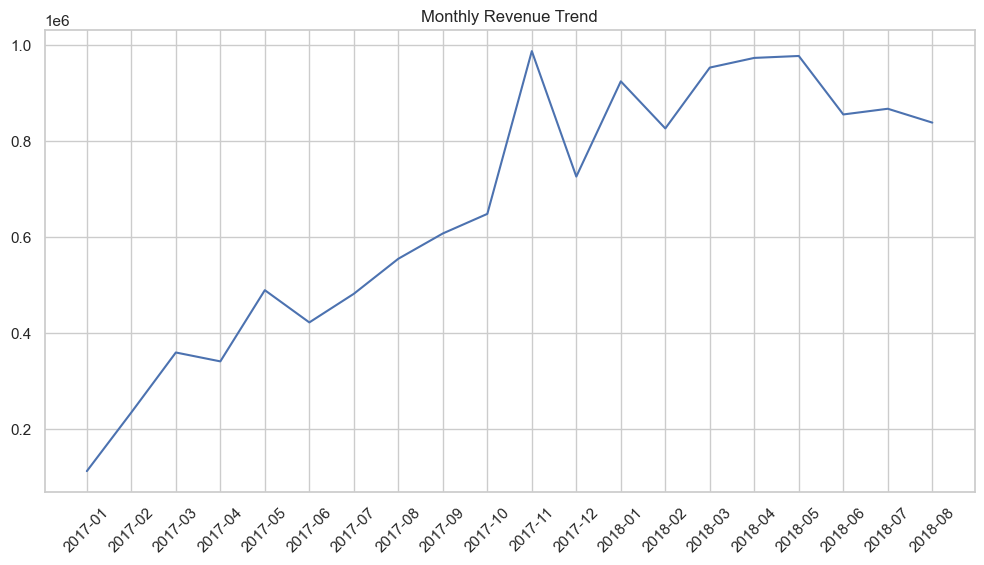

In [40]:
plt.figure(figsize=(12,6))
plt.plot(monthly['year_month'].astype(str), monthly['revenue'])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()

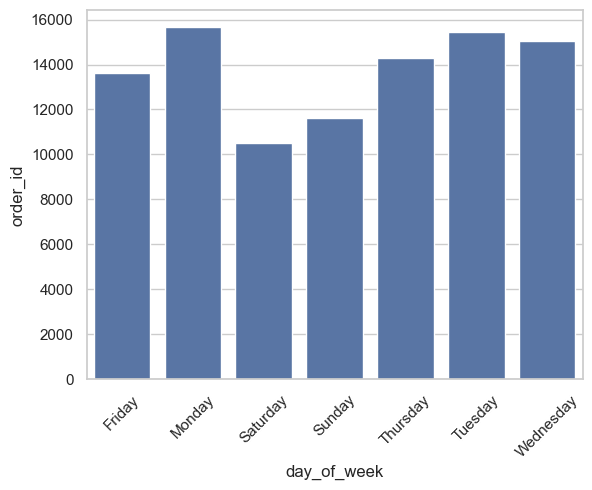

In [41]:
sns.barplot(data=daily_pattern, x='day_of_week', y='order_id')
plt.xticks(rotation=45)
plt.show()

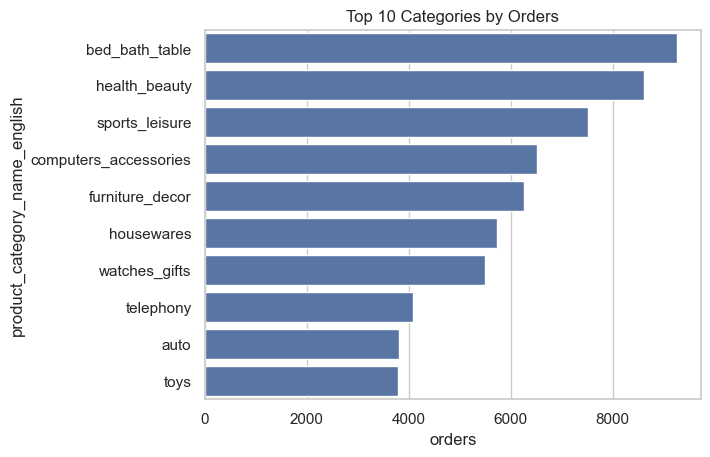

In [42]:
sns.barplot(
    data=top10_volume,
    y='product_category_name_english',
    x='orders'
)
plt.title("Top 10 Categories by Orders")
plt.show()

In [43]:
# Monthly trends
monthly.to_csv(output_path + "M1_Monthly_Trends.csv", index=False)

# Daily pattern
daily_pattern.to_csv(output_path + "M1_Daily_Pattern.csv", index=False)

# Hourly pattern
hourly_pattern.to_csv(output_path + "M1_Hourly_Pattern.csv", index=False)

# Category summary
category_summary.to_csv(output_path + "M1_Category_Summary.csv", index=False)

# Top 10 categories
top10_volume.to_csv(output_path + "M1_Top10_Volume.csv", index=False)
top10_revenue.to_csv(output_path + "M1_Top10_Revenue.csv", index=False)

# State summary
state_summary.to_csv(output_path + "M1_State_Summary.csv", index=False)

# Delivery comparison
delivery_comparison.reset_index().to_csv(
    output_path + "M1_Delivery_Comparison.csv",
    index=False
)

# Seasonality
seasonality.to_csv(output_path + "M1_Seasonality.csv", index=False)


In [44]:
kpi_summary = pd.DataFrame({
    "Metric": [
        "Total Orders",
        "Total Revenue",
        "Average Order Value",
        "Avg Items per Order"
    ],
    "Value": [
        total_orders,
        total_revenue,
        aov,
        avg_items
    ]
})

kpi_summary.to_csv(output_path + "M1_KPI_Summary.csv", index=False)
